In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.datasets import make_blobs

# Add parent directory to path
import sys
import os
sys.path.append(os.path.split(os.path.abspath(os.getcwd()))[0])
from useful_tools import plot_boundary

from IPython.display import Image

# Introduksjon til beslutningstrær

Beslutningstrær er en intuitiv maskinlæringsteknikk som kan brukes til både klassifikasjon og regresjon.

## Klassifikasjon

Den lokale vindsurfeklubben har lyst til å bruke temperatur og vind til å finne ut når det er gode forhold for vindsurfing. Derfor har de samlet data om temperatur og vindhastiget i sommermånedene de siste ti årene, i tillegg til å ha testet om det faktisk var mulig å vindsurfe. Dataene kan du se i et scatterplot nedenfor. 

In [60]:
num_days = 30*10
wind = np.random.uniform(0, 13, num_days)
temp = np.random.uniform(10, 28, num_days)
classes = (np.greater(wind, 8) & np.greater(temp, 20)).astype(int)

df = pd.DataFrame(data={'good': classes, 'wind': wind, 'temp': temp}, index=range(len(classes)))
df.head()

,good,temp,wind
0,0,14.861639,4.288812
1,0,11.213764,1.409631
2,0,25.048226,6.851217
3,1,24.943070,8.988754
4,0,20.191921,0.933081


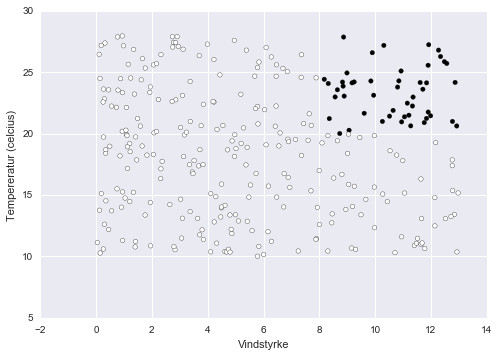

In [63]:
plt.scatter(wind, temp, c=classes)
plt.xlabel('Vindstyrke')
plt.ylabel('Tempe1ratur (celcius)')
plt.show()

Når vi ser på datane, ser det ut som at vi kan dele opp dataene våre ved `wind=8`. På den venstre siden ser vi dermed at det kun blir dager med dårlige forhold. 

Den høyre siden kan vi på nytt dele opp, men denne gangen vil det ha mer for seg å dele opp ved `temp=20` i stedet for å dele opp `wind` ytterligere.

Vi kan nå stoppe, siden vi ser at alle de svarte ligger innenfor et område, mens alle de hvite ligger innenfor et annet. 

Det er på mer eller mindre akkurat samme måten at trening av beslutningstrær fungerer: Vi begynner med hele planet. Så deler vi opp  langs en av aksene på den måten som gir størst mulig forbedring. Med det får vi altså to regioner.

Videre velger vi den regionen og den oppdelingen av regionen som gir best mulig forbedring akkurat som før. For hver splitt får vi to nye regioner. Alle regioner og 'alle' mulige splitter vurderes til hver splitt. Dette fortsetter helt til vi når et kriterium som er satt på forhånd. Dette kan for eksempel være å stoppe når ingen av splittene har flere enn et visst antall punkter. Klassifikatoren vi ender opp med i forrige eksempel ser slik ut:

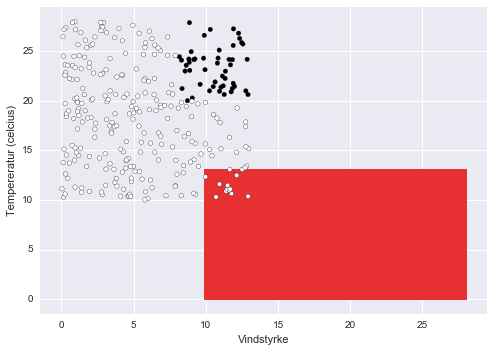

In [87]:
tree = DecisionTreeClassifier()
x = df.drop(['good'], axi)


plt.scatter(wind, temp, c=classes)
plt.xlabel('Vindstyrke')
plt.ylabel('Tempereratur (celcius)')
plt.show()

In [81]:
np.array(df.drop(['good'], axis=1))

array([[ 14.8616391 ,   4.28881198],
       [ 11.21376371,   1.40963051],
       [ 25.04822607,   6.85121742],
       [ 24.94306965,   8.9887535 ],
       [ 20.19192138,   0.93308148],
       [ 10.8862195 ,  11.40377488],
       [ 25.37888698,   5.78420327],
       [ 13.09784511,   3.63851291],
       [ 13.41300085,  12.83688701],
       [ 20.99292892,  12.76953283],
       [ 27.10625295,   2.94209755],
       [ 14.06224846,   9.19014298],
       [ 22.14486343,   0.72345929],
       [ 20.5018905 ,   3.02669601],
       [ 19.20407363,   5.19642627],
       [ 15.71053105,   9.25243872],
       [ 13.39162402,   4.99322573],
       [ 18.53111477,   1.21789218],
       [ 25.60698173,   6.46173279],
       [ 16.67875429,   8.80765825],
       [ 10.40006564,   4.61393385],
       [ 24.16164592,  11.61260659],
       [ 19.72476164,   0.26206815],
       [ 17.37047257,   3.67113258],
       [ 10.57618427,   9.29813637],
       [ 20.60412339,   6.41937217],
       [ 15.11280014,   4.10748258],
 

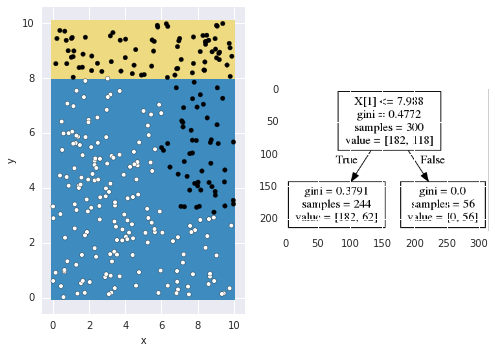

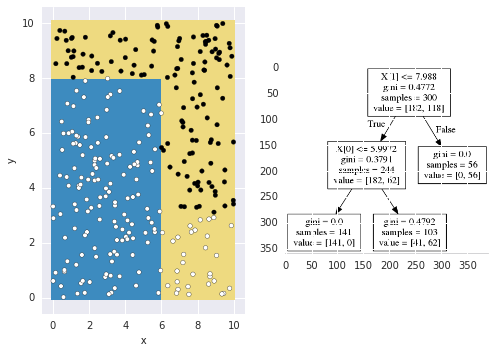

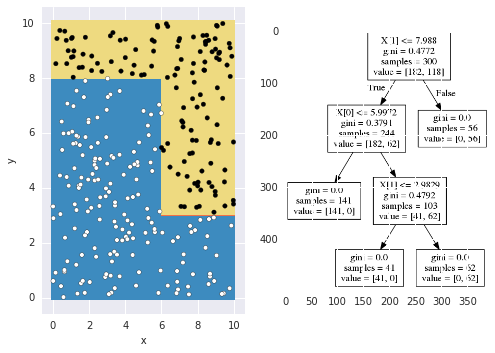

In [134]:
X = np.random.uniform(0, 10, (300, 2))
classes = np.greater(X[:,0], 6).astype(int)
classes = np.logical_and(np.greater(X[:,1], 3), classes)
classes = np.logical_or(np.greater(X[:,1], 8), classes)

for i in range(2, 5):
    tree = DecisionTreeClassifier(max_leaf_nodes=i)
    tree.fit(X, classes)
    export_graphviz(tree, out_file='tree_{}'.format(i))
    plt.subplot(121)
    plot_boundary(X, tree)
    plt.scatter(X[:,0], X[:,1], c=classes)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(122)
    plt.imshow(plt.imread('trees/tree_{}.png'.format(i)))
    plt.show()

Vi ser at vi først splitter ved y=8. Deretter blir det blå området splittet ved x=6. Til slutt splitter vi ved y=6. Legg merke til at det kun er den høyre gruppen fra forrige splitt som ble delt opp.

Når vi har et klassifikasjonsproblem, vil vi klassifisere punkter som havner i en gruppe til å være den klassen som forekommer flest ganger i den gruppen.

## Lineære grenser
Trær ser ut til å fungere godt i eksempelet ovenfor, men hva skjer hvis grensene ikke er vinkelrette på aksene?

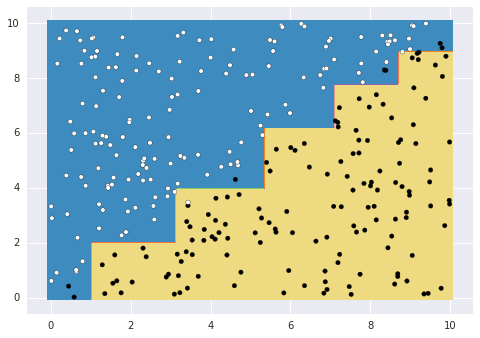

In [135]:
classes = np.greater(X[:,0], X[:,1])

tree_linear = DecisionTreeClassifier(min_samples_leaf=5)
tree_linear.fit(X, classes)

plot_boundary(X, tree_linear)
plt.scatter(X[:,0], X[:,1], c=classes)
plt.show()

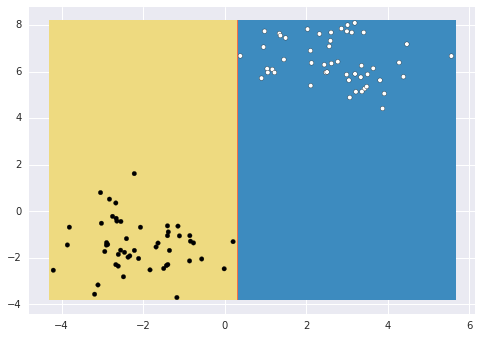

In [136]:
x, y = make_blobs(centers=2)

tree_blob = DecisionTreeClassifier(min_samples_leaf=5)
tree_blob.fit(x, y)

plot_boundary(x, tree_blob)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

## Regresjon

Å tilpasse et regresjonstre er nesten det samme som å tilpasse et klassifiseringstre. Forskjellene er at vi med et regresjonstre ønsker å minimerer summen av treningsfeil, i motsetning til å minimiere feilrate, som med klassifikasjonstrær. I tillegg er det annerledes når vi predikerer. Dersom et datapunkt havner i en gruppe, vil verdien predikeres til det som er gjennomsnittet til de andre datapunktene i gruppa.

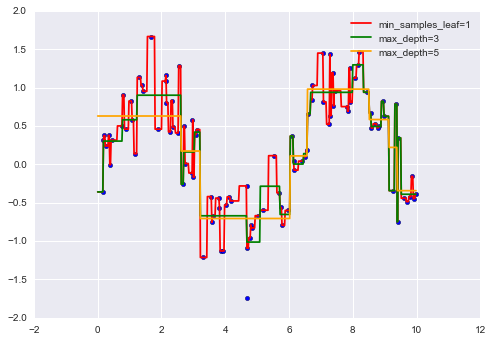

In [72]:
num_points = 100
x = np.random.uniform(0, 10, num_points).reshape(-1, 1)
y = np.sin(x).ravel() + np.random.normal(scale=0.4, size=num_points)

tree_reg_1 = DecisionTreeRegressor()
tree_reg_2 = DecisionTreeRegressor(max_depth=5)
tree_reg_3 = DecisionTreeRegressor(max_depth=3)

for tree, color in zip((tree_reg_1, tree_reg_2, tree_reg_3), ('red', 'green', 'orange')):
    tree.fit(x, y)

    x_test = np.arange(0, 10, 0.02)[:, np.newaxis]
    y_test = tree.predict(x_test)

    plt.plot(x_test, y_test, color=color)
plt.scatter(x, y)
plt.legend(('min_samples_leaf=1', 'max_depth=3', 'max_depth=5'))
plt.show()

Som vi kan se, er det veldig lett å overtilpasse. Det kan derfor være lurt å justere parameterne til treet. For eksempel kan man sette begrensninger med dybden til treet (`max_depth`) eller kreve et større antall noder i hver løvnode (`min_samples_leaf`).

In [73]:
help(plot_boundary)

Help on function plot_boundary in module useful_tools:

plot_boundary(X, clf, plot_step=0.02, padding=0.1)
    Plots the decision boundary in two dimensions for a classifier
    
    X: Data
    clf: Classifier
    plot_step: Distance between each point in the mesh
    padding: Padding in each direction

